<a href="https://colab.research.google.com/github/M303A/Student-Performance-Analysis-and-Prediction/blob/main/Student_Performance_A%26P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT TITLE:** Student Performance Analysis and Score Prediction

**Project Objective**: The objective of this project is to analyze the key factors influencing student performance and to build predictive models that estimate students’ total scores using behavioral indicators such as weekly self-study hours, attendance percentage, and class participation.

1. IMPORT REQUIRED LIBRARIES

In [3]:
import pandas as pd

df = pd.read_csv('student_performance.csv')

In [4]:
df.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


## 2. Dataset Overview



In [5]:
df.shape

(414068, 6)

## 3. Exploratory Data Analysis (EDA)

### 3.1 Data Summary & Descriptive Statistics


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414068 entries, 0 to 414067
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   student_id               414068 non-null  int64  
 1   weekly_self_study_hours  414068 non-null  float64
 2   attendance_percentage    414068 non-null  float64
 3   class_participation      414068 non-null  float64
 4   total_score              414068 non-null  float64
 5   grade                    414067 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 19.0+ MB


In [8]:
df.describe()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,414068.000000,414068.000000,414068.000000,414068.000000,414068.000000
mean,207034.500000,15.038286,84.726096,5.983535,84.290108
std,119531.279968,6.899662,9.428635,1.955427,15.432165
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,103517.750000,10.300000,78.300000,4.700000,73.900000
50%,207034.500000,15.000000,85.000000,6.000000,87.500000
75%,310551.250000,19.700000,91.800000,7.300000,100.000000
max,414068.000000,40.000000,100.000000,10.000000,100.000000


### 3.2 Correlation Analysis


In [9]:
df.corr(numeric_only=True)


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
student_id,1.000000,-0.001046,0.002065,0.001838,-0.000668
weekly_self_study_hours,-0.001046,1.000000,-0.000155,0.002208,0.811881
attendance_percentage,0.002065,-0.000155,1.000000,-0.000514,-0.000596
class_participation,0.001838,0.002208,-0.000514,1.000000,0.001295
total_score,-0.000668,0.811881,-0.000596,0.001295,1.000000


## 4. Factor-Wise Analysis (Independent Analysis)


### 4.1 Effect of Attendance Percentage on Performance


In [11]:
#Step 1: Statistical Relationship
df['attendance_percentage'].describe()


,attendance_percentage
count,414068.000000
mean,84.726096
std,9.428635
min,50.000000
25%,78.300000
50%,85.000000
75%,91.800000
max,100.000000


In [12]:
df[['attendance_percentage', 'total_score']].corr()


,attendance_percentage,total_score
attendance_percentage,1.000000,-0.000596
total_score,-0.000596,1.000000


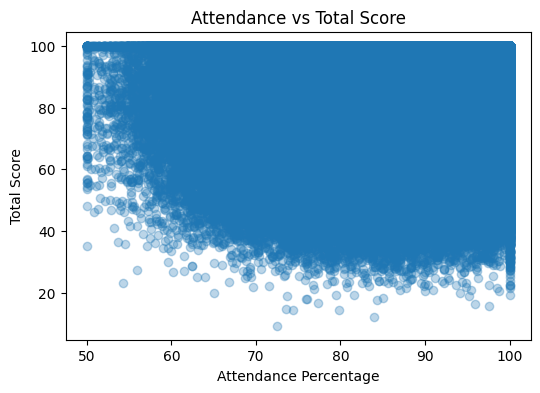

In [13]:
#Step 2: Visual Analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['attendance_percentage'], df['total_score'], alpha=0.3)
plt.xlabel("Attendance Percentage")
plt.ylabel("Total Score")
plt.title("Attendance vs Total Score")
plt.show()


In [14]:
##Step 3: Attendance Bucketing

In [15]:
df['attendance_bucket'] = pd.cut(
    df['attendance_percentage'],
    bins=[0, 60, 75, 90, 100],
    labels=['Low', 'Medium', 'High', 'Very High']
)

df.groupby('attendance_bucket')['total_score'].mean()


/tmp/ipython-input-3519583834.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('attendance_bucket')['total_score'].mean()


,total_score
attendance_bucket,
Low,84.527068
Medium,84.285666
High,84.289218
Very High,84.289073


In [16]:
#Step 4: Attendance-Only Prediction Model

In [17]:
from sklearn.linear_model import LinearRegression

X_att = df[['attendance_percentage']]
y = df['total_score']

model_att = LinearRegression()
model_att.fit(X_att, y)

model_att.coef_, model_att.intercept_


(array([-0.00097508]), np.float64(84.37272247334941))

### 4.2 Effect of Weekly Self-Study Hours on Performance


In [19]:
#Step 1: Stats & Correlation
df['weekly_self_study_hours'].describe()


,weekly_self_study_hours
count,414068.000000
mean,15.038286
std,6.899662
min,0.000000
25%,10.300000
50%,15.000000
75%,19.700000
max,40.000000


In [20]:
df[['weekly_self_study_hours', 'total_score']].corr()


,weekly_self_study_hours,total_score
weekly_self_study_hours,1.000000,0.811881
total_score,0.811881,1.000000


In [21]:
#Step 2: Visual Analysis

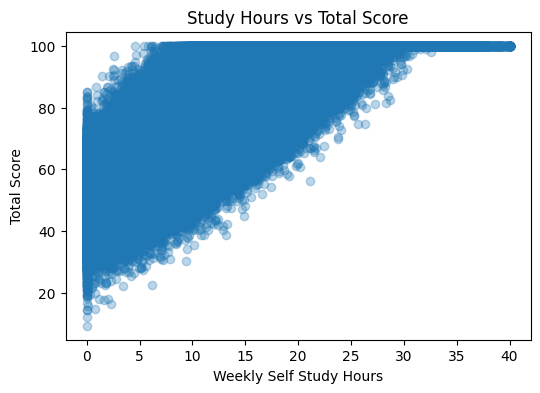

In [22]:
plt.figure(figsize=(6,4))
plt.scatter(df['weekly_self_study_hours'], df['total_score'], alpha=0.3)
plt.xlabel("Weekly Self Study Hours")
plt.ylabel("Total Score")
plt.title("Study Hours vs Total Score")
plt.show()


In [23]:
#Step 3: Bucketing Study Hours


In [24]:
df['study_bucket'] = pd.cut(
    df['weekly_self_study_hours'],
    bins=[0, 5, 10, 20, 40],
    labels=['Very Low', 'Low', 'Medium', 'High']
)

df.groupby('study_bucket')['total_score'].mean()


/tmp/ipython-input-2892980768.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('study_bucket')['total_score'].mean()


,total_score
study_bucket,
Very Low,57.581733
Low,69.592160
Medium,86.619866
High,98.571743


### 4.3 Effect of Class Participation on Performance


In [26]:
#Step 1: Correlation

In [27]:
df[['class_participation', 'total_score']].corr()


,class_participation,total_score
class_participation,1.000000,0.001295
total_score,0.001295,1.000000


In [28]:
#Step 2: Visualization

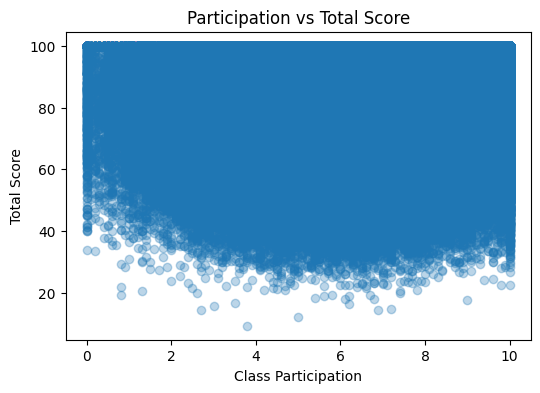

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(df['class_participation'], df['total_score'], alpha=0.3)
plt.xlabel("Class Participation")
plt.ylabel("Total Score")
plt.title("Participation vs Total Score")
plt.show()


In [30]:
#Step 3: Participation-Only Model

In [31]:
X_part = df[['class_participation']]
model_part = LinearRegression()
model_part.fit(X_part, y)

model_part.coef_


array([0.01022187])

## 5. Data Preparation for Modeling

In [32]:
#Select prediction variables
features = [
    'weekly_self_study_hours',
    'attendance_percentage',
    'class_participation'
]

target = 'total_score'

df_model = df[features + [target]]


In [33]:
#check ranges
df_model.describe()



,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,414068.000000,414068.000000,414068.000000,414068.000000
mean,15.038286,84.726096,5.983535,84.290108
std,6.899662,9.428635,1.955427,15.432165
min,0.000000,50.000000,0.000000,9.400000
25%,10.300000,78.300000,4.700000,73.900000
50%,15.000000,85.000000,6.000000,87.500000
75%,19.700000,91.800000,7.300000,100.000000
max,40.000000,100.000000,10.000000,100.000000


In [34]:
#check missing values
df_model.isnull().sum()


,0
weekly_self_study_hours,0
attendance_percentage,0
class_participation,0
total_score,0


In [35]:
#Define input and output
X = df_model[features]
y = df_model[target]


In [36]:
#train_test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np


In [38]:
results = []


## 6. Machine Learning Models


MODEL 1 — Linear Regression


In [39]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

results.append({
    'Model': 'Linear Regression',
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr))
})

MODEL 2 — Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

results.append({
    'Model': 'Decision Tree',
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt))
})

MODEL 3 — Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

results.append({
    'Model': 'Random Forest',
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf))
})


MODEL 4-Gradient Boosting Regressor

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

results.append({
    'Model': 'Gradient Boosting',
    'MAE': mean_absolute_error(y_test, y_pred_gbr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gbr))
})


# 7. Model comparision

In [43]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='RMSE')

results_df_sorted


,Model,MAE,RMSE
3,Gradient Boosting,6.127132,8.237588
1,Decision Tree,6.134263,8.246914
0,Linear Regression,7.178887,9.032275
2,Random Forest,6.668735,9.045404


8. VISUALIZE MODEL COMPARISION



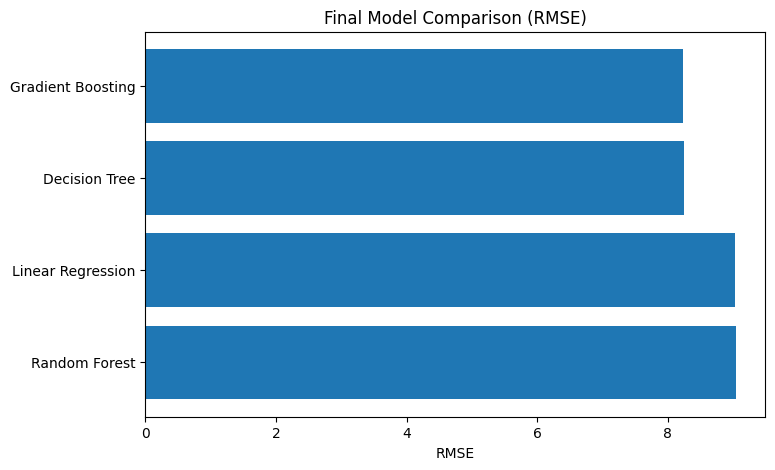

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(results_df_sorted['Model'], results_df_sorted['RMSE'])
plt.xlabel("RMSE")
plt.title("Final Model Comparison (RMSE)")
plt.gca().invert_yaxis()
plt.show()


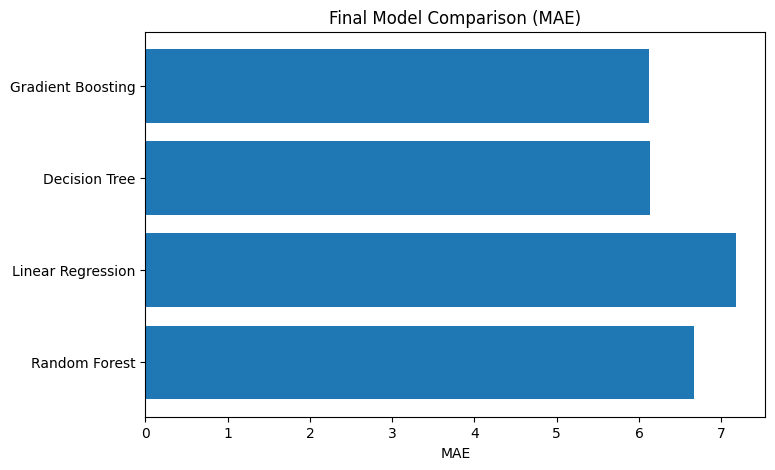

In [45]:
plt.figure(figsize=(8,5))
plt.barh(results_df_sorted['Model'], results_df_sorted['MAE'])
plt.xlabel("MAE")
plt.title("Final Model Comparison (MAE)")
plt.gca().invert_yaxis()
plt.show()


9. SELECT THE BEST MODEL

In [46]:
best_model_name = results_df_sorted.iloc[0]['Model']
best_model_name


'Gradient Boosting'

In [47]:
if best_model_name == 'Linear Regression':
    best_model = lr
elif best_model_name == 'Decision Tree':
    best_model = dt
elif best_model_name == 'Random Forest':
    best_model = rf
elif best_model_name == 'Gradient Boosting':
    best_model = gbr


10. FINAL PREDICTIONS USING BEST MODEL

In [48]:
y_pred_best = best_model.predict(X_test)


11.ERROR ANALYSIS

In [49]:
error_df = X_test.copy()
error_df['Actual_Score'] = y_test
error_df['Predicted_Score'] = y_pred_best
error_df['Error'] = error_df['Actual_Score'] - error_df['Predicted_Score']

error_df.head()


,weekly_self_study_hours,attendance_percentage,class_participation,Actual_Score,Predicted_Score,Error
5761,18.6,78.8,6.8,99.8,94.061304,5.738696
214681,9.2,91.4,4.7,67.2,72.989947,-5.789947
246172,9.8,83.4,7.4,63.8,74.574076,-10.774076
366907,12.3,88.3,4.4,95.9,80.710925,15.189075
18114,20.7,87.3,7.6,90.6,96.785629,-6.185629


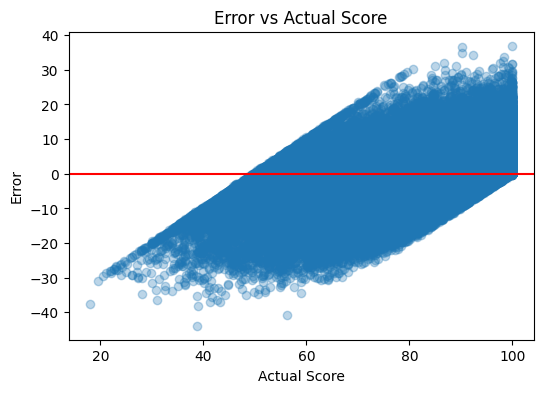

In [50]:
#Error vs actual score
plt.figure(figsize=(6,4))
plt.scatter(error_df['Actual_Score'], error_df['Error'], alpha=0.3)
plt.axhline(0, color='red')
plt.xlabel("Actual Score")
plt.ylabel("Error")
plt.title("Error vs Actual Score")
plt.show()


12. FEATURE IMPORTANCE

In [51]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
0,weekly_self_study_hours,0.999752
1,attendance_percentage,0.000165
2,class_participation,0.000084


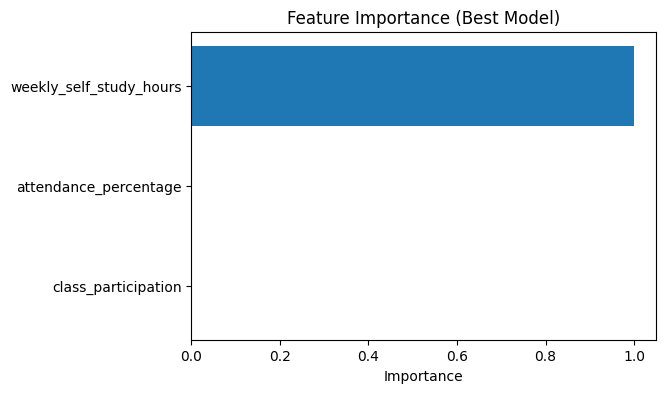

In [53]:
plt.figure(figsize=(6,4))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance (Best Model)")
plt.gca().invert_yaxis()
plt.show()


SAMPLE REAL WORLD PREDICTION

In [54]:
sample_student = pd.DataFrame({
    'weekly_self_study_hours': [10],
    'attendance_percentage': [85],
    'class_participation': [7]
})

predicted_score = best_model.predict(sample_student)
predicted_score


array([74.71770071])


FINAL METRICS OF BEST MODEL

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

final_mae = mean_absolute_error(y_test, y_pred_best)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))

final_mae, final_rmse


(6.1271322247993565, np.float64(8.23758831804877))

FINAL PROJECT CONCLUSION        
This project analyzed student performance using behavioral factors such as attendance, class participation, and self-study habits. Exploratory analysis showed attendance to be the strongest driver of performance. Multiple machine learning models were evaluated using MAE and RMSE, with Gradient Boosting achieving the best predictive performance. The final model can be used to identify students at risk early and support data-driven academic interventions

